# Machine Learning Assignment
                                                                                               Shane Healy, November 2019

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats 
import seaborn as sns
import keras as kr
import tensorflow as tf
import sklearn.preprocessing as pre
import sklearn.decomposition as dec
import sklearn.model_selection as mod
import sklearn.metrics as met

Using TensorFlow backend.


In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12.6, 9)

In [3]:
# Data Set from Github, Ref.1.
dfu = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

#Sorting the dataframe by variable medv, this sorts data rows from lowest to highest median house value
#Sorting done to visualise from plots what could be most influencial factors in median house value
df = dfu.sort_values('medv')


## Boston Housing Price DataSet

### Background

The Boston Housing dataset contains information collected by the U.S Census Service concerning housing in the area of Boston, USA.

The data was originally published by Harrison, D. and Rubinfeld, D.L. "Hedonic prices and the demand for clean air", J. Environ. Economics & Management, vol.5, 81-102, 1978, Ref.2.

The dataset has been used to benchmark algorithms and as a demonstration of machine learning process. The dataset contains a total of 506 cases.


There are 14 attributes for each case:
* CRIM - per capita crime rate by town 
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940 
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways 
* TAX - full-value property-tax rate per 10,000 dolla bills
* PTRATIO - pupil-teacher ratio by town 
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - percentage lower status of the population 
* MEDV - Median value of owner-occupied homes in $1000's <b><i>RESULT</i></br>


### Factors Influencing House Price

From initial review, based on personal perception of what factors could significantly influence median value of owner occupied houses, the factors were seperated into high and low impact factors as shown below: 


 Attribute | Why Flagged as High Impact Factor     
:------|:------
   CRIM  | People dont like crime, impacts on safety
   RM  | Implies larger properties, more invested wealth
   DIS  | Easy commuting / commerce, buses etc. 
   TAX  | What GOV estimates for value for property
   CHAS  | Distinct in data set so assume flagged as important
   Bk  | American is divided, race factors in US wealth and social structure 
   LSTAT | lower status: less £   


 Attribute | Why Flagged as Low Impact Factor     
:------|:------ 
   ZN  | Unknown
   INDUS  | Unknown
   PTRATIO  | Important but possibly lower budgeted people residing: unknown
   NOX  | Important but possibly accepted for city living
   AGE  | Unknown 
   RAD  | Commuting factors


### Describe Statistics of Data Set

In [4]:
# Below check that all fields have values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
df.describe().T

count        mean         std        min         25%        50%  \
crim     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
zn       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
indus    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
chas     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
nox      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
rm       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
age      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
dis      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
rad      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
tax      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
ptratio  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
b        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
lstat    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
medv     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
crim       3.677082   88.9762  
zn        12.500000  100.0000  
indus     18.100000   27.7400  
chas       0.000000    1.0000  
nox        0.624000    0.8710  
rm         6.623500    8.7800  
age       94.075000  100.0000  
dis        5.188425   12.1265  
rad       24.000000   24.0000  
tax      666.000000  711.0000  
ptratio   20.200000   22.0000  
b        396.225000  396.9000  
lstat     16.955000   37.9700  
medv      25.000000   50.0000

#### Observations from Statistics
* Different scales for all factors, some in hundreds, some in decimal
* Large variation in standard deviation, TAX has the highest while NOX has the lowest
* CHAS is either a true or false

### Visualise the median house price

In [6]:
houseprice = df['medv']

In [7]:
houseprice.mean(), houseprice.min(), houseprice.max(), houseprice.std()

(22.532806324110673, 5.0, 50.0, 9.197104087379817)

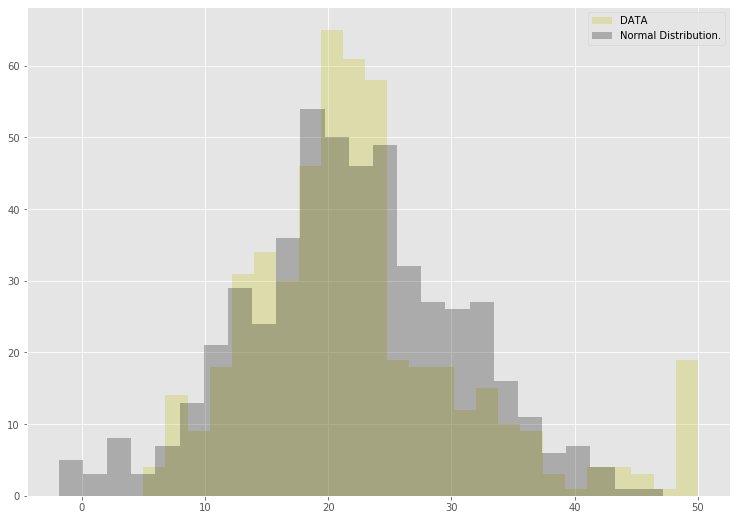

In [8]:
# Create histograms to visualise the distribution of house prices
plt.hist(houseprice, bins=25, color='y', alpha=0.25, label="DATA")
plt.hist(np.random.normal(22.53, 9.2, 506), color='k', alpha=0.25, bins = 25, label = "Normal Distribution.")
plt.legend()
plt.show()

On plotting the median house price against a random normal distribution, the dataset appears relatively normally distributed with the dataset skewed to the right. The spike at far right of about plot for data doesn't fit the normal distribution. 

In [9]:
r = houseprice.value_counts()
r, r.values

(50.0    16
 25.0     8
 23.1     7
 21.7     7
 22.0     7
         ..
 32.9     1
 25.3     1
 15.3     1
 32.2     1
 17.7     1
 Name: medv, Length: 229, dtype: int64,
 array([16,  8,  7,  7,  7,  6,  6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 

There are 229 unique house price values in dataset. 
16 cases have a value of 50 ($50,000), this is out of trend in the dataset, perhaps when collecting the data an accurate figure was not collected but indicated if in range e.g. median house price greater than 50. 

#### Creating a new DataFrame to Remove rows Where median house price = 50 

In [10]:

indexNames = df[df['medv'] == 50 ].index

# Delete these row indexes from dataFrame and create new dataframe
dfReduced = df.drop(indexNames, inplace = False)

In [11]:
houseprice = dfReduced['medv']

In [12]:
# Removing values of 50 from dataframe drops the standard deviation from 9.2--> 7.8
houseprice.mean(), houseprice.min(), houseprice.max(), houseprice.std()

(21.63591836734694, 5.0, 48.8, 7.86530106298026)

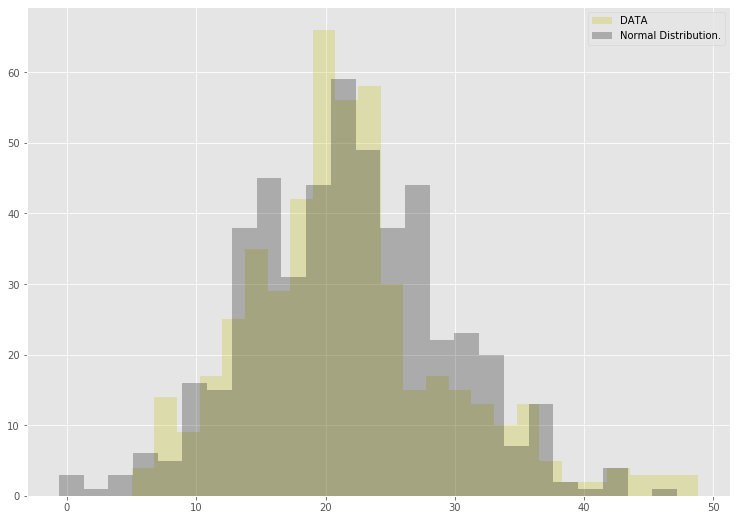

In [13]:
# Create histograms to visualise the distribution of house prices with values of 50 removed
plt.hist(houseprice, bins=25, color='y', alpha=0.25, label="DATA")
plt.hist(np.random.normal(21.64, 7.87, 490), color='k', alpha=0.25, bins = 25, label = "Normal Distribution.")
plt.legend()
plt.show()

Having removed 16 values of medv=50, less skew is apparent in plot, where the median of a randomly generated normally distribution and median of the data set appear more aligned. 

### Plots to Describe the Data Set 
In this section, the 13 factors will be plotted against median house price, MEDV, for full Boston DataSet, 506 cases. 
The objective is to visualise the variation in the values of the 13 factors and to assess if there are any "obvious" trends between factors and the result of median house price. 

The boston housing price dataframe was sorted when read in, the objective was to make the relationship between factors and price more apparent. For the same reason Matplotblib.pyplot FILL plots were used in this section. These provide a good visualisation if there is a direct correlation present.

To allow visualisation of factors against MEDV, certain factors were scaled during plotting. 

In [14]:
MEDV = df['medv']

CRIM = df['crim']
RM = df['rm']
DIS = df['dis']
TAX = df['tax']
CHAS = df['chas']
BK = df['b']
LSTAT = df['lstat']
CHAS = df['chas']
ZN = df['zn']
INDUS  = df['indus']
PTRATIO  = df['ptratio']
NOX  = df['nox']
AGE  = df['age']
RAD  = df['rad']

Text(0.5, 1.0, 'Visualise Median House Price, MEDV')

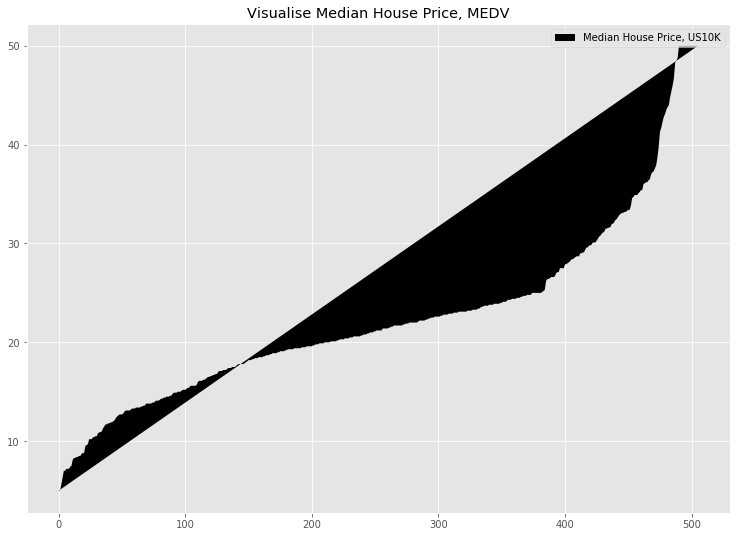

In [15]:
x = np.arange(0.0, 506, 1.0)
medv = np.sort(MEDV)
plt.fill(x, medv, 'k-', label="Median House Price, US10K")
plt.legend()
plt.title("Visualise Median House Price, MEDV")

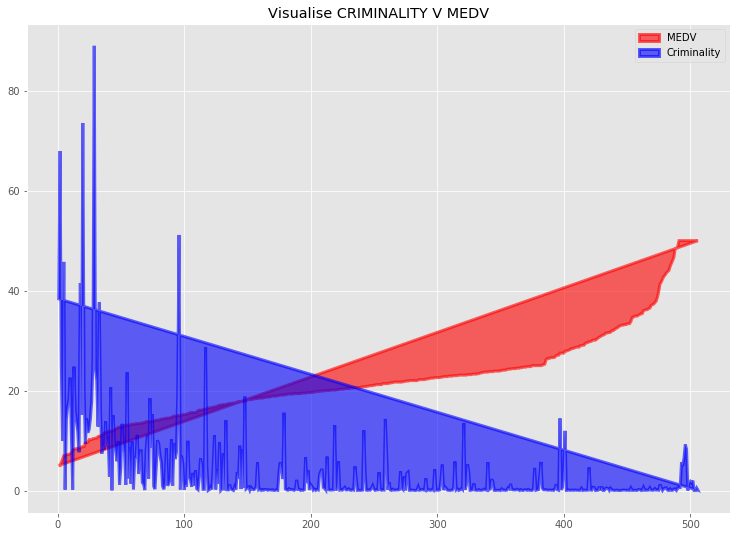

In [16]:
x = np.arange(1, 507, 1.0)

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, CRIM, c='b', alpha=0.6, lw=3.0, label="Criminality")

plt.title("Visualise CRIMINALITY V MEDV")
plt.legend();

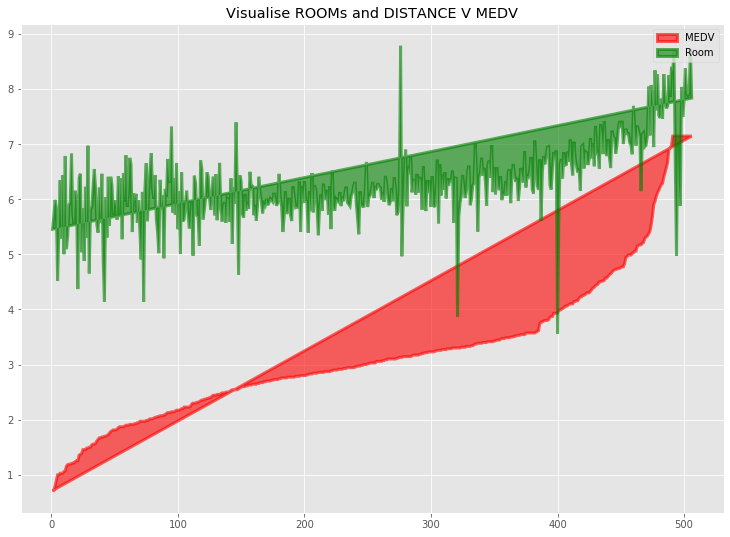

In [17]:
x = np.arange(1, 507, 1.0)

# Scaling MEDV to allow visualisation in Plot
plt.fill(x, MEDV/7, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, RM, c='g', alpha=0.6, lw=3.0, label ="Room")

plt.title("Visualise ROOMs and DISTANCE V MEDV")
plt.legend();

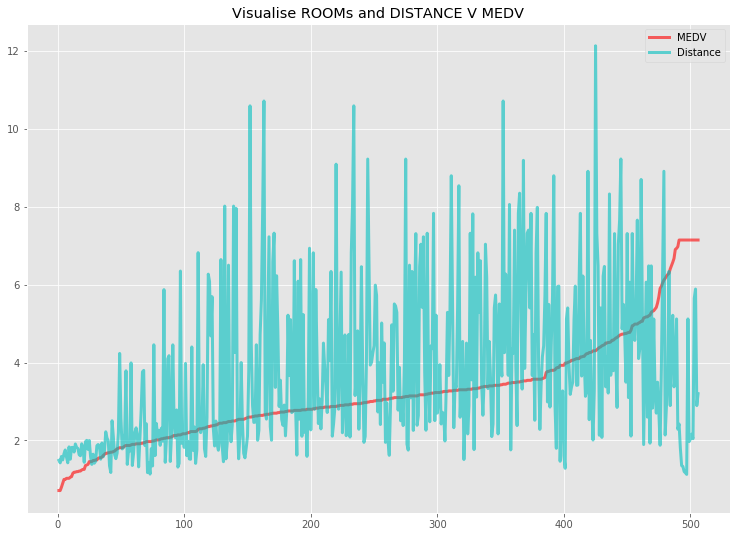

In [18]:
x = np.arange(1, 507, 1.0)

# Scaling MEDV to allow visualisation in Plot
plt.plot(x, MEDV/7, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.plot(x, DIS, c='c', alpha=0.6, lw=3.0, label ="Distance")

plt.title("Visualise ROOMs and DISTANCE V MEDV")
plt.legend();

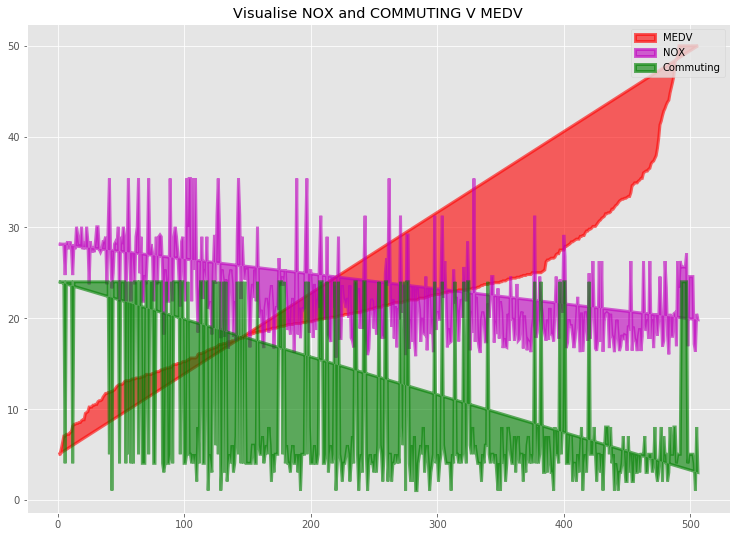

In [19]:
x = np.arange(1, 507, 1.0)



#Scaling NOX parameter to view against Median house price 
scaleNOX = NOX * (MEDV.mean()/NOX.mean())

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, scaleNOX, c='m', alpha=0.6, lw=3.0, label ="NOX")
plt.fill(x, RAD, c='g', alpha=0.6, lw=3.0, label ="Commuting")

plt.title("Visualise NOX and COMMUTING V MEDV")
plt.legend();

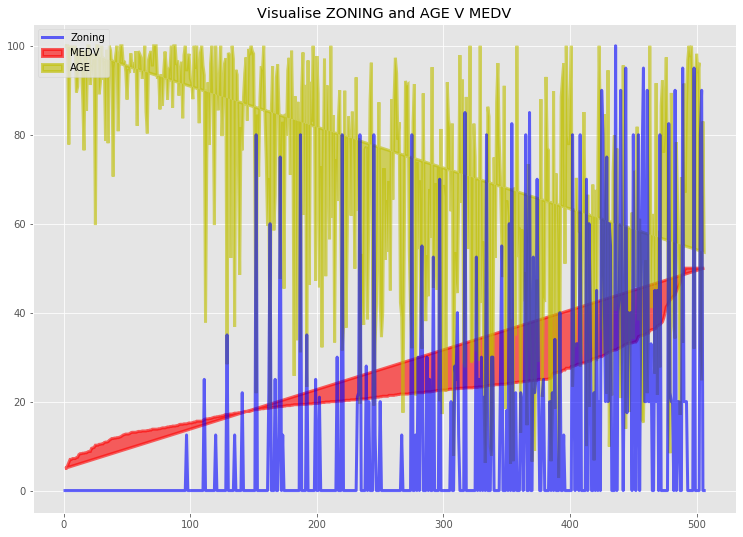

In [20]:
x = np.arange(1, 507, 1.0)

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.plot(x, ZN, c='b', alpha=0.6, lw=3.0, label ="Zoning")
plt.fill(x, AGE, c='y', alpha=0.6, lw=3.0, label ="AGE")


plt.title("Visualise ZONING and AGE V MEDV")
plt.legend();

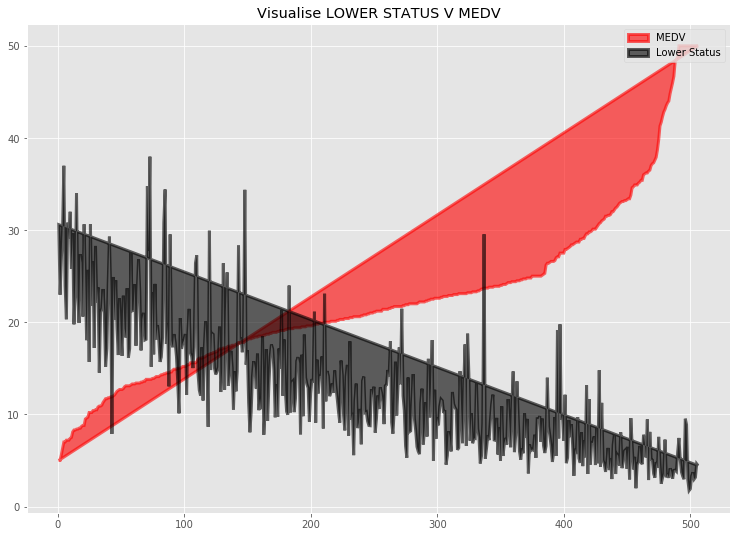

In [21]:
x = np.arange(1, 507, 1.0)

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, LSTAT, c='k', alpha=0.6, lw=3.0, label ="Lower Status")

plt.title("Visualise LOWER STATUS V MEDV")
plt.legend();

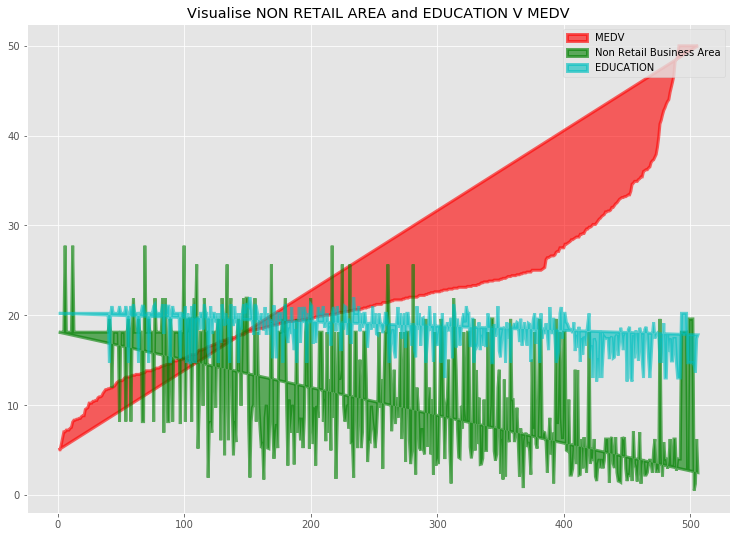

In [22]:
x = np.arange(1, 507, 1.0)

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, INDUS, c='g', alpha=0.6, lw=3.0, label ="Non Retail Business Area")
plt.fill(x, PTRATIO, c='c', alpha=0.6, lw=3.0, label ="EDUCATION")

plt.title("Visualise NON RETAIL AREA and EDUCATION V MEDV")
plt.legend();

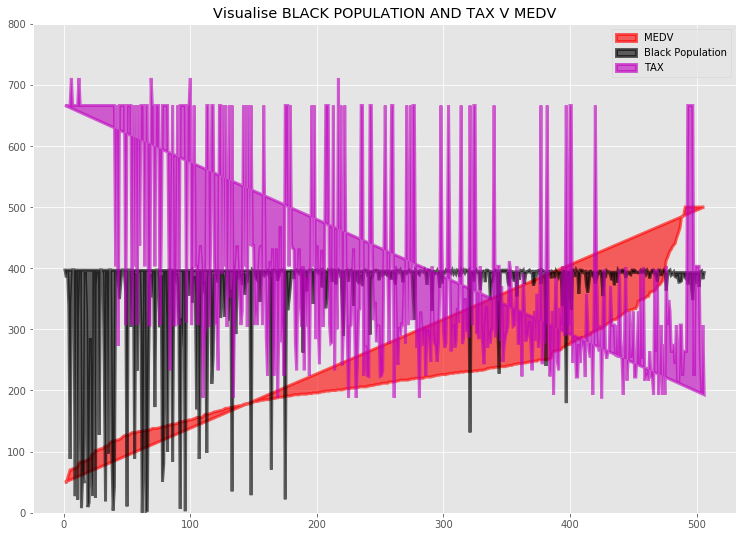

In [23]:
x = np.arange(1, 507, 1.0)

plt.fill(x, MEDV*10, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, BK, c='k', alpha=0.6, lw=3.0, label ="Black Population")
plt.fill(x, TAX, c='m', alpha=0.6, lw=3.0, label ="TAX")


x1,x2,y1,y2 = plt.axis()

plt.axis((x1,x2,0,800))


plt.title("Visualise BLACK POPULATION AND TAX V MEDV")
plt.legend();

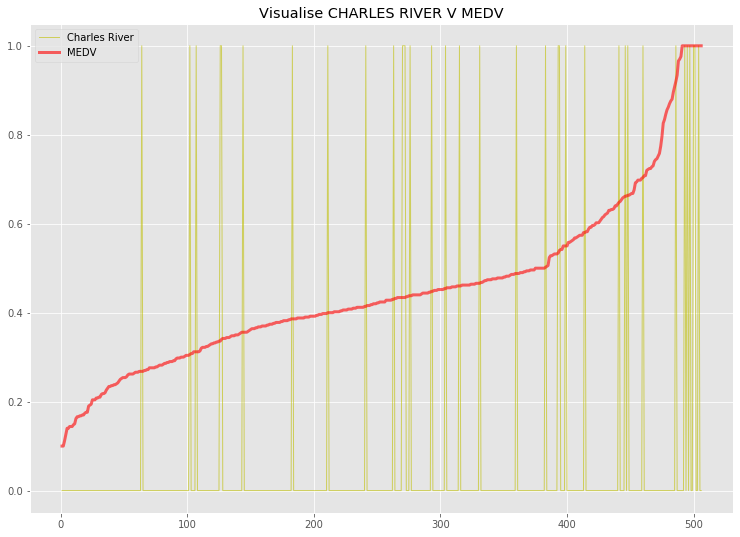

In [24]:
x = np.arange(1, 507, 1.0)

plt.plot(x, CHAS, c='y', alpha=0.6, lw=1.0, label ="Charles River")
plt.plot(x, MEDV/50, c='r', alpha=0.6, lw=3.0, label ="MEDV")

plt.title("Visualise CHARLES RIVER V MEDV")
plt.legend();

## Charles River Impact
The objective of this section is to use inferential statistics to analyse whether there is a significant difference in median house prices between houses that border the Charles River and those that do not border the Charles River.

In [25]:
# CHAS variable: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
CHAS.sum()

35

From 506 data rows, there are 35 cases where CHAS variable is true.

In [26]:
# Selecting rows where chas variable is true
dfCHAS = df.loc[df['chas'] == 1]

In [27]:
# Selecting data for median house price
a = dfCHAS['medv']

In [28]:
print("The median house price bordering Charles river is",a.median())

The median house price bordering Charles river is 23.3


In [29]:
# Selecting rows where chas variable is NOT true
dfnCHAS = df.loc[df['chas'] == 0]

In [30]:
# Selecting data for median house price
b = dfnCHAS['medv']

In [31]:
print("The median house price bordering not Charles river is",b.median())

The median house price bordering not Charles river is 20.9


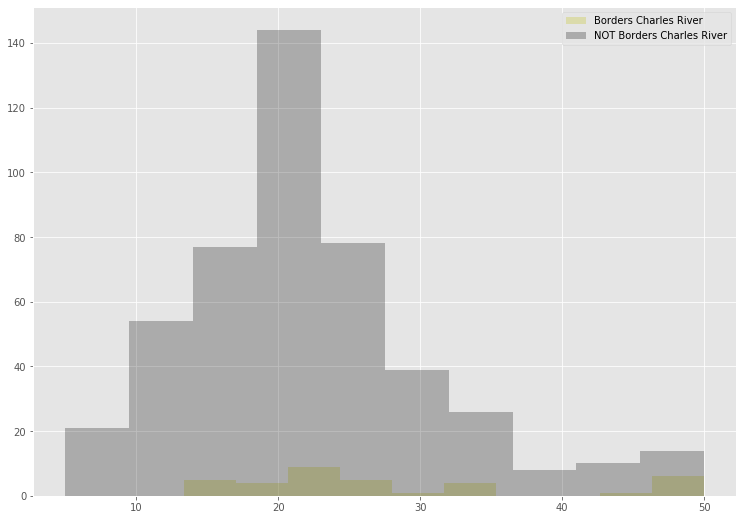

In [32]:
plt.hist(a, color='y', alpha=0.25, label="Borders Charles River")
plt.hist(b, color='k', alpha=0.25, label="NOT Borders Charles River")
plt.legend()
plt.show()

### T-TEST

The independent t-test could be used to compare the means of the two groups (independant variables) below with regard to the same dependant variable of house price:
* houses bordering the Charles river
* housees not bordering the Charles river

To check if data can be analysed with independant t-test there are six assumptions that should be checked before progressing, Ref.3.
1. Dependant variable, house price, should be measured on a continuous scale. House price measured on US$ scale.
2. Independant variables should be two independant catagorical groups. Bordering Charles river : True or False.
3. Independance of observations. Assumed no relationahsip between data in each group or between groups.
4. No significant outliers. From plotting medv, no significant outliers apparent.
5. Dependant variable, house price, should be normally distributed for each group. Discussed below.
6. Requires homogeneity of variances. Discussed below.

#### Are groups for median house prices normally distributed, are T-Tests applicable
As plotted at beginning of notebook to visualise the median house price, overall the data set appears normally distributed.

In below cell a check was performed with QQ plot from statsmodels, fit against the expected diagonal pattern for normal distribution is accentuted at the upper and lower bounds but overall a reasonable fit.

A similar appearance of below graph is generated for:
* The overall set of data on median house prices
* Group bordering the Charles River
* Group not bordering Charles River

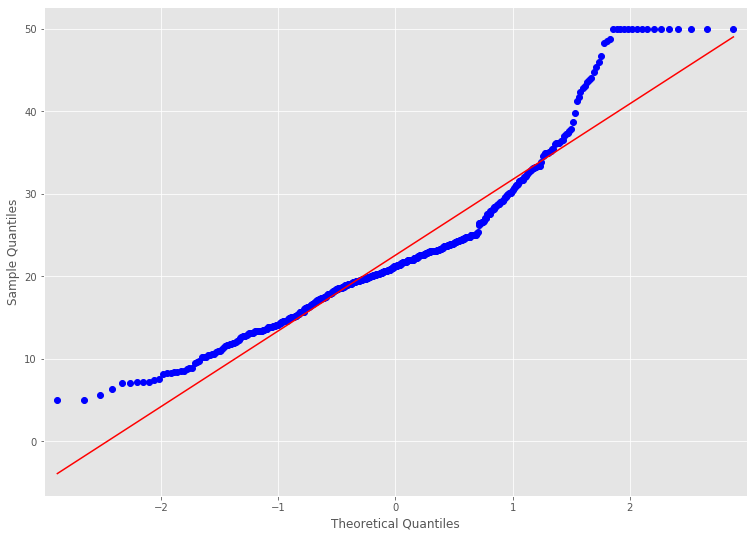

In [33]:
from statsmodels.graphics.gofplots import qqplot
qqplot(MEDV, line='s')
plt.show()

#### Following cell uses stats.normaltest to assess distribution of:
* medv, All median house prices  <b>Appears not normal distribution</b>
* a, Median house prices bordering Charles River <b>Appears normal distribution</b>
* b, Median house prices not bordering Charles River <b>Appears not normal distribution</b>

If p from stats.normaltest > alpha, appears normal / Gaussian.

In [34]:

alpha = 0.05

stat, p = stats.normaltest(medv)
print('MEDV, all data, Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = stats.normaltest(a)
print('Houses bordering Charles River, Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = stats.normaltest(b)
print('Houses not bordering Charles River, Statistics=%.3f, p=%.3f' % (stat, p))



MEDV, all data, Statistics=90.975, p=0.000
Houses bordering Charles River, Statistics=5.439, p=0.066
Houses not bordering Charles River, Statistics=81.133, p=0.000


#### Homogeneity of variances, are T-Tests applicable
The Levene test tests the null hypothesis that all input samples are from populations with equal variances. 

If the resulting p-value of Levene's test is less than a value of 0.05, the obtained differences in sample variances are unlikely to be from a population with equal variances. Therefore the null hypothesis of equal variances is rejected and it is concluded that there is a difference between the variances in the population, Ref.4.

In [35]:
# center = mean: Recommended from SciPy documentation for symmetric, moderate-tailed distributions.
stats.levene(a,b,center='mean')

LeveneResult(statistic=8.751904896045993, pvalue=0.003238119367639829)

Given a close approximation to normal distribution for each group of median house prices, and from failed Levene test for homogeneity of variances will use Welch's t-test.

Welch's T-Test is a two sample test used to test the hypotheses that two populations have equal means and suited where two samples have unequal variances and/or unequal sample sizes, Ref.5.

In [36]:
stats.ttest_ind(df['medv'][df['chas']==1], df['medv'][df['chas']==0], equal_var=0)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

### Conclusion on Charles River Impact
As the P Value from Welsh's T-Test of 0.0036 is less than indicator of 0.05, this shows significance. 
Therefore the null hypothesis that the two population means are equal is rejected and there is a significant difference in median house prices between houses that border the Charles river and those that do not. 

This relys on an assumption of normallly distributed data.  

<br/>

## Model
The objective of this section is to use Keras package to create a neural network that can predict the median house price based on the other variables in the dataset.

Keras was initially developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System)


### Assessment of Factors from Plots

Reviewing the plots from beginning of notebook, the following observations were made:

* Overall shape of sorted median house prices, MEDV, appears polynomial.
* Criminality, CRIM, has large variation, but as expected variation and values are lower at higher MEDV values. 
* Room has low levels of variation, relative to other factors, and appears to correlate well with MEDV.
* Distance and Zoning have large variation and no trend with MEDV is apparent.
* NOX, Commuting, Age and Non Retail Business Area, overall, seem to be inversely proportional to MEDV with large variation. 
* Lower Status, LSTAT, and Education, PTRATIO, have low levels of variation, relative to other factors, and appears to inversely correlate well with MEDV.
* TAX and Black Population have variation but appears inversely proportional to MEDV.
* CHAS as a TRUE/FALSE does not seem to correlate with MEDV.

Therefore, the following five factors seem like appropriate choices to begin modelling with:
* RM - average number of rooms per dwelling
* LSTAT - percentage lower status of the population
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* TAX - full-value property-tax rate per 10,000 dolla bills

Factors remaining:
* NOX - nitric oxides concentration (parts per 10 million)
* INDUS - proportion of non-retail business acres per town.
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* AGE - proportion of owner-occupied units built prior to 1940 
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways 

### Assessment of Factors from Correlation Matrix

(14.0, 0.0)

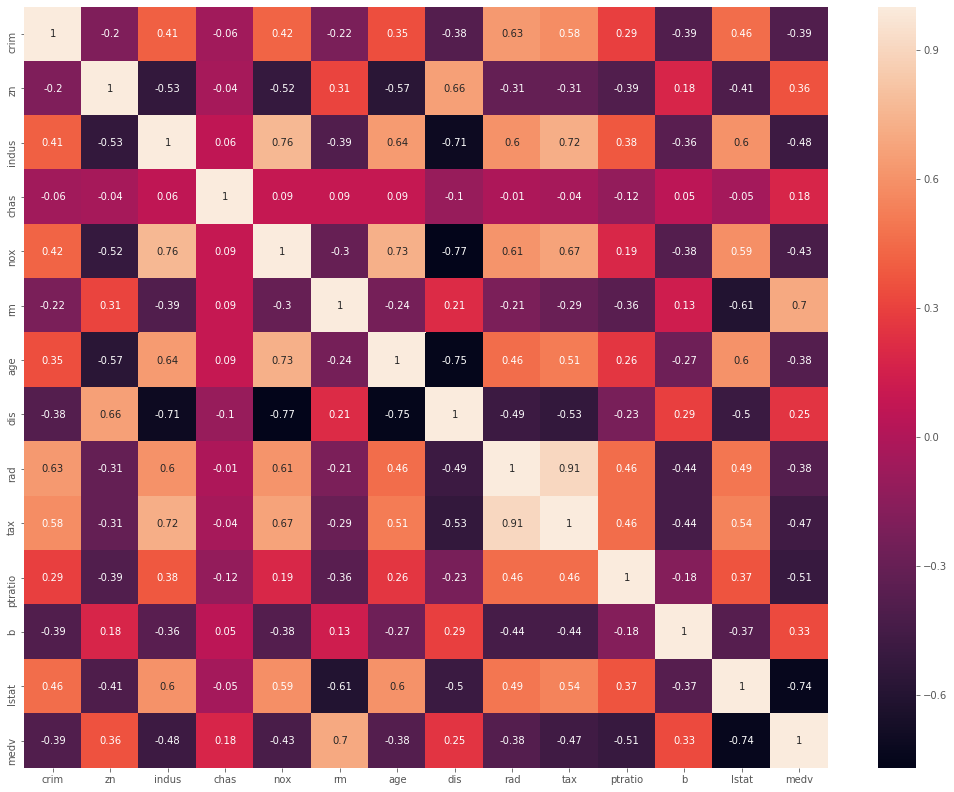

In [37]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(18,14))
ax = sns.heatmap(data=correlation_matrix, annot=True)

# Axis parameters set to display plot fully 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

From correlation matrix, MEDV has highest correlation with following factors (in order of absolute correlation):
* lstat
* rm
* ptratio
* Indus
* Tax
* NOX

The remaining factors have simimlar correlation values apart from chas which has the lowest.
This is similar to information gleaned from visualising plots of factors, however indus was not identified and bk was identified from visualisaing plots.


The highest correlation between factors excluding MEDV are:
* lstat and rm --> Given these factors have highest correlation with MEDV, their own correlation requires consideration
* tax with rad
* tax with indus
* nox with (indus,age)
* dis with (indus, nox, age) 


### Measuring Accuracy of Neural Network for Assignment

Two measures were chosen to assess accuracy of generated models from neural networks:

* <b>Mean Squared Error</b>
<p>Mean squared error is the average squared difference between the estimated values and the actual value. Values closer to zero indicate a better fitting model. As the MSE values are dependant on the scale of the result values, subjective measure of accuracy.</p>
<br/>
* <b>Coefficient of Determination, R Squared(R2)</b>
<p>The coefficient of determination ranges from 0 to 1. It is a measure of how well results are replicated by the model based on the proportion of the variance in the factors that are predicted by the result. A result of 0 would indicate a model that predicts the mean of the results, a result of 1 indicates a perfect fit for the model parameters, Ref.6. The range of 0 to 1 provides an intuitive perspective for analysing models.</p>

<br/>

### Preliminary Analysis on Partial Dataset
The objective of this section is to reduce the number of factors in dataset, as indicated by correlation matrix, and assess how the data reacts to Scaling and Partial Component Analysis prior to creating neural network. For this section the data was not split into TESTING and TRAINING datasets. 

#### DEFINE INPUTs and OUTPUT

In [38]:
inputs = df[['rm','lstat','ptratio','indus','tax','nox']]
#inputs = df[['rm','lstat','ptratio']]

In [39]:
output = df[['medv']]

#### Standard Scaler
SKLearn pre processing function standardises the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 

In [40]:
scaler = pre.StandardScaler()
scaler.fit(inputs)
scaler.mean_, scaler.scale_

(array([  6.28463439,  12.65306324,  18.4555336 ,  11.13677866,
        408.23715415,   0.55469506]),
 array([7.01922514e-01, 7.13400164e+00, 2.16280519e+00, 6.85357058e+00,
        1.68370495e+02, 1.15763115e-01]))

#### Setup and Run Neural Network

In [41]:
m = kr.models.Sequential()

In [42]:
m.add(kr.layers.Dense(10,input_dim=6,activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(200, activation="relu"))
m.add(kr.layers.Dense(50, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")
m.fit(inputs,output,epochs=25,batch_size=50)







Epoch 1/25





506/506 [==============================] - 2s 3ms/step - loss: 246.6178
Epoch 2/25
506/506 [==============================] - 0s 95us/step - loss: 229.2067
Epoch 3/25
506/506 [==============================] - 0s 117us/step - loss: 220.1574
Epoch 4/25
506/506 [==============================] - 0s 103us/step - loss: 214.4941
Epoch 5/25
506/506 [==============================] - 0s 135us/step - loss: 206.6634
Epoch 6/25
506/506 [==============================] - 0s 188us/step - loss: 201.6764
Epoch 7/25
506/506 [==============================] - 0s 190us/step - loss: 192.8197
Epoch 8/25
506/506 [==============================] - 0s 127us/step - loss: 189.4484
Epoch 9/25
506/506 [==============================] - 0s 133us/step - loss: 176.8380
Epoch 10/25
506/506 [==============================] - 0s 188us/step - loss: 157.4296
Epoch 11/25
506/506 [==============================] - 0s 178us/step - loss: 148.5932
Epoch 12/25
506/506 [==============================] - 

#### Predict and Plot Results

In [43]:
# Run each value through the neural network.
p = m.predict(inputs)
print("The R^2 value for model is",met.r2_score(MEDV,p).round(2))
print("The Mean Square Error for model is",met.mean_squared_error(MEDV,p))

The R^2 value for model is 0.32
The Mean Square Error for model is 57.12318089998171


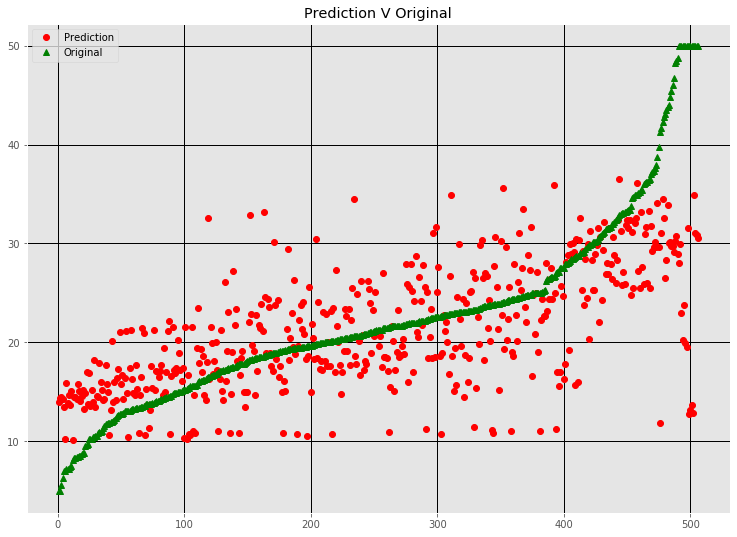

In [44]:
# Plot the values
x = np.arange(1, 507, 1.0)

plt.plot(x, p, 'ro', label='Prediction')
plt.plot(x, MEDV, 'g^', label='Original')
plt.grid(color = 'black', linewidth=1)
plt.title("Prediction V Original")
plt.legend()

#### Principal Component Analysis
Principal Component Anaylsis, PCA, reduces the dimensions of input data. The new components are calculated as the main dimensions of variation and may not have a particular meaning. PCA is effected by scale so required to scale data factors before applying, Ref.7.

In [45]:
pca = dec.PCA(n_components=6, whiten=True)
pca.fit(inputs)
xwhite = pd.DataFrame(pca.transform(inputs), columns=inputs.columns)

In [46]:
# Below cell indicates that the first principal component contains 99.7% of the variance. 
pca.explained_variance_ratio_


array([9.97803583e-01, 1.46560350e-03, 5.94566491e-04, 1.25936725e-04,
       1.01534969e-05, 1.56742087e-07])

#### Setup and Run Neural Network

In [47]:
m = kr.models.Sequential()

In [48]:
m.add(kr.layers.Dense(10,input_dim=6,activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(200, activation="relu"))
m.add(kr.layers.Dense(50, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")
m.fit(xwhite,output,epochs=25,batch_size=50)

Epoch 1/25
506/506 [==============================] - 1s 2ms/step - loss: 565.4591
Epoch 2/25
506/506 [==============================] - 0s 166us/step - loss: 459.1496
Epoch 3/25
506/506 [==============================] - 0s 97us/step - loss: 261.3915
Epoch 4/25
506/506 [==============================] - 0s 109us/step - loss: 164.0720
Epoch 5/25
506/506 [==============================] - 0s 97us/step - loss: 124.9824
Epoch 6/25
506/506 [==============================] - 0s 103us/step - loss: 93.3406
Epoch 7/25
506/506 [==============================] - 0s 303us/step - loss: 72.40780s - loss: 84.
Epoch 8/25
506/506 [==============================] - 0s 168us/step - loss: 57.1897
Epoch 9/25
506/506 [==============================] - 0s 105us/step - loss: 45.8716
Epoch 10/25
506/506 [==============================] - 0s 129us/step - loss: 38.0500
Epoch 11/25
506/506 [==============================] - 0s 125us/step - loss: 32.4029
Epoch 12/25
506/506 [==============================] - 0s 1

#### Predict and Plot Results

In [49]:
# Run each x value through the neural network.
p = m.predict(xwhite)
print("The R^2 value for model is",met.r2_score(MEDV,p).round(2))
print("The Mean Square Error for model is",met.mean_squared_error(MEDV,p))

The R^2 value for model is 0.81
The Mean Square Error for model is 15.780618081639705


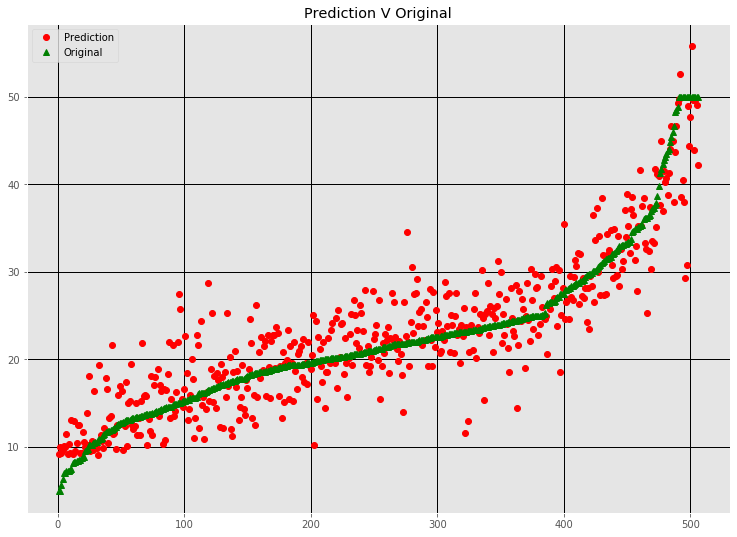

In [50]:
# Plot the values
x = np.arange(1, 507, 1.0)
plt.plot(x, p, 'ro', label='Prediction')
plt.plot(x, MEDV, 'g^', label='Original')
plt.grid(color = 'black', linewidth=1)
plt.title("Prediction V Original")
plt.legend()

<br/>

### Preliminary Analysis on Full Dataset
The objective of this section is use all 13 factors of dataset and assess how the data reacts to Scaling and Partial Component Analysis prior to creating neural network. For this section the data was not split into TESTING and TRAINING datasets. 

* CRIM - per capita crime rate by town 
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940 
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways 
* TAX - full-value property-tax rate per 10,000 dolla bills
* PTRATIO - pupil-teacher ratio by town 
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - percentage lower status of the population


#### DEFINE INPUTs and OUTPUT

In [51]:
inputs = df[['rm','lstat','ptratio','indus','tax','nox','rad','zn','age','dis','crim','chas','b']]

In [52]:
output = df[['medv']]

#### Standard Scaler

In [53]:
scaler = pre.StandardScaler()
scaler.fit(inputs)
scaler.mean_, scaler.scale_

(array([6.28463439e+00, 1.26530632e+01, 1.84555336e+01, 1.11367787e+01,
        4.08237154e+02, 5.54695059e-01, 9.54940711e+00, 1.13636364e+01,
        6.85749012e+01, 3.79504269e+00, 3.61352356e+00, 6.91699605e-02,
        3.56674032e+02]),
 array([7.01922514e-01, 7.13400164e+00, 2.16280519e+00, 6.85357058e+00,
        1.68370495e+02, 1.15763115e-01, 8.69865112e+00, 2.32993957e+01,
        2.81210326e+01, 2.10362836e+00, 8.59304135e+00, 2.53742935e-01,
        9.12046075e+01]))

#### Setup and Run Neural Network

In [54]:
m = kr.models.Sequential()

In [55]:
m.add(kr.layers.Dense(10,input_dim=13,activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(200, activation="relu"))
m.add(kr.layers.Dense(50, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")
m.fit(inputs,output,epochs=25,batch_size=50)

Epoch 1/25
506/506 [==============================] - 2s 4ms/step - loss: 878.9263
Epoch 2/25
506/506 [==============================] - 0s 392us/step - loss: 175.1367
Epoch 3/25
506/506 [==============================] - 0s 216us/step - loss: 112.5642
Epoch 4/25
506/506 [==============================] - 0s 228us/step - loss: 86.2500
Epoch 5/25
506/506 [==============================] - 0s 166us/step - loss: 76.3081
Epoch 6/25
506/506 [==============================] - 0s 97us/step - loss: 72.7451
Epoch 7/25
506/506 [==============================] - 0s 254us/step - loss: 72.5657
Epoch 8/25
506/506 [==============================] - 0s 200us/step - loss: 68.2368
Epoch 9/25
506/506 [==============================] - 0s 164us/step - loss: 68.8417
Epoch 10/25
506/506 [==============================] - 0s 109us/step - loss: 67.9093
Epoch 11/25
506/506 [==============================] - 0s 103us/step - loss: 67.0486
Epoch 12/25
506/506 [==============================] - 0s 95us/step - loss

#### Predict and Plot Results

In [56]:
# Run each value through the neural network.
p = m.predict(inputs)
print("The R^2 value for model is",met.r2_score(MEDV,p).round(2))
print("The Mean Square Error for model is",met.mean_squared_error(MEDV,p))

The R^2 value for model is 0.21
The Mean Square Error for model is 66.97537494802792


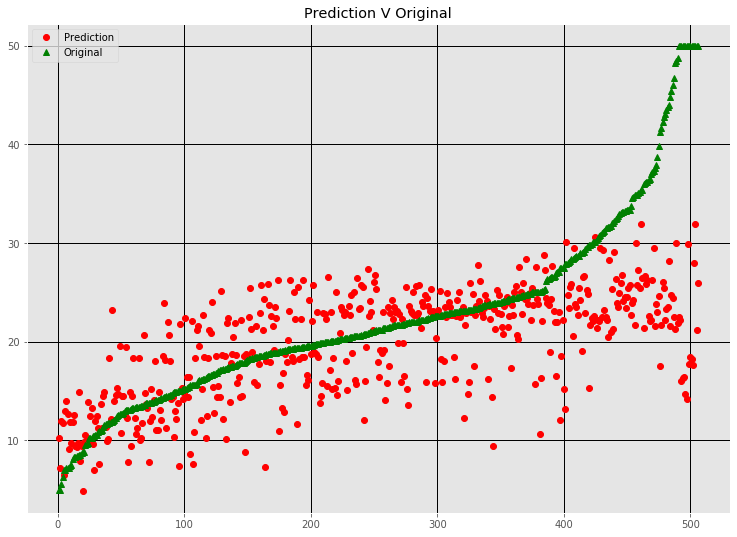

In [57]:
# Plot the values
x = np.arange(1, 507, 1.0)
plt.plot(x, p, 'ro', label='Prediction')
plt.plot(x, MEDV, 'g^', label='Original')
plt.grid(color = 'black', linewidth=1)
plt.title("Prediction V Original")
plt.legend()

#### Principal Component Analysis

In [58]:
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(inputs)
xwhite = pd.DataFrame(pca.transform(inputs), columns=inputs.columns)


In [59]:
# Below cell indicates that the first principal component contains 80.5% of the variance. 
pca.explained_variance_ratio_

array([8.05823175e-01, 1.63051968e-01, 2.13486092e-02, 6.95699061e-03,
       1.29995193e-03, 7.27220158e-04, 4.19044539e-04, 2.48538539e-04,
       8.53912023e-05, 3.08071548e-05, 6.65623182e-06, 1.56778461e-06,
       7.96814208e-08])

#### Setup and Run Neural Network

In [60]:
m = kr.models.Sequential()

In [61]:
m.add(kr.layers.Dense(10,input_dim=13,activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(200, activation="relu"))
m.add(kr.layers.Dense(50, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")
m.fit(xwhite,output,epochs=25,batch_size=50)

Epoch 1/25
506/506 [==============================] - 2s 5ms/step - loss: 562.4705
Epoch 2/25
506/506 [==============================] - 0s 349us/step - loss: 444.5732
Epoch 3/25
506/506 [==============================] - 0s 305us/step - loss: 225.8872
Epoch 4/25
506/506 [==============================] - 0s 192us/step - loss: 135.3218
Epoch 5/25
506/506 [==============================] - 0s 299us/step - loss: 94.8989
Epoch 6/25
506/506 [==============================] - 0s 458us/step - loss: 75.2212
Epoch 7/25
506/506 [==============================] - 0s 317us/step - loss: 62.6239
Epoch 8/25
506/506 [==============================] - 0s 329us/step - loss: 54.3132
Epoch 9/25
506/506 [==============================] - 0s 464us/step - loss: 48.6110
Epoch 10/25
506/506 [==============================] - 0s 230us/step - loss: 42.8889
Epoch 11/25
506/506 [==============================] - 0s 107us/step - loss: 40.7594
Epoch 12/25
506/506 [==============================] - 0s 95us/step - lo

#### Predict and Plot Results

In [62]:
# Run each x value through the neural network.
p = m.predict(xwhite)
print("The R^2 value for model is",met.r2_score(MEDV,p).round(2))
print("The Mean Square Error for model is",met.mean_squared_error(MEDV,p))

The R^2 value for model is 0.77
The Mean Square Error for model is 19.361731092477342


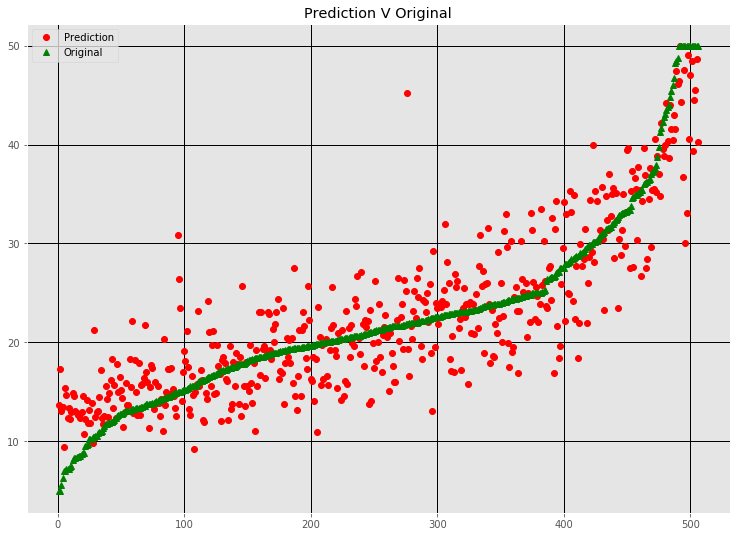

In [63]:
# Plot the values
x = np.arange(1, 507, 1.0)
plt.plot(x, p, 'ro', label='Prediction')
plt.plot(x, MEDV, 'g^', label='Original')
plt.grid(color = 'black', linewidth=1)
plt.title("Prediction V Original")
plt.legend()

### Conclusion Following Preliminary Analysis of Partial and Full Datasets
Running neural network with reduced number of inputs provided a better R2, coefficient of determination, value, with the best result from PCA and not scaling factors.
Therefore, for creating final neural network, a reduced dataset using Partial Component Analysis will be starting point. 

<br/>

### Final Analysis of Boston Housing Dataset

As discussed at beginning of notebook, during visualisation of median house price, there are 16 cases where medv has a value of 50 ($50,000), this is out of trend in the dataset, perhaps when collecting the data an accurate figure was not collected but indicated if in range e.g. median house price greater than 50. 

These 16 cases have been removed from the dataset, stored in Pandas dataframe dfReduced and will be used for remainder of analysis. 

#### Choice of Factors to Include in Model

From correlation matrix, MEDV has highest correlation with following factors:
* lstat
* rm
* ptratio

The highest correlation between factors excluding MEDV are:
* lstat and rm 
* tax with rad
* tax with indus
* nox with (indus,age)
* dis with (indus, nox, age)

All nine factors shown above will be used as inputs into neural network.
Rationale is that because there is correlation between factors, when Principal Component Analysis is used to reduce the dimensions of inputs, the correlation between factors will be considered providing a more accurate model. Trails of using only the 3,4 or 5 factors with highest correlation to medv did not provide as high accuracy as using these nine factors.

#### DEFINE INPUTs and OUTPUT

In [572]:
inputs = dfReduced[['rm','lstat','ptratio','indus','tax','nox','dis','age','rad']]


In [573]:
output = dfReduced[['medv']]

#### Split into Testing and Training

In [574]:
inputs_train, inputs_test, output_train, output_test = mod.train_test_split(inputs, output, test_size=0.2)

#### Principal Component Analysis

In [575]:
pca = dec.PCA(n_components=9, whiten=True)
pca.fit(inputs_train)
inputs_train_white = pd.DataFrame(pca.transform(inputs_train), columns=inputs.columns)

In [576]:
pca.n_components_

9

#### Setup and Run Neural Network

In [577]:
m = kr.models.Sequential()

In [578]:
m.add(kr.layers.Dense(50,input_dim=9,activation="tanh"))
m.add(kr.layers.Dense(100, activation="relu"))
#m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(10, activation="linear"))
m.add(kr.layers.Dense(1, activation="linear"))

#logcosh looks promising

m.compile(loss="logcosh", optimizer="adam")
m.fit(inputs_train_white,output_train,epochs=100,batch_size=50)

Epoch 1/100
392/392 [==============================] - 3s 7ms/step - loss: 19.8943
Epoch 2/100
392/392 [==============================] - 0s 113us/step - loss: 17.5844
Epoch 3/100
392/392 [==============================] - 0s 107us/step - loss: 14.0214
Epoch 4/100
392/392 [==============================] - 0s 133us/step - loss: 8.5200
Epoch 5/100
392/392 [==============================] - 0s 146us/step - loss: 4.5551
Epoch 6/100
392/392 [==============================] - 0s 115us/step - loss: 3.7694
Epoch 7/100
392/392 [==============================] - 0s 151us/step - loss: 2.5915
Epoch 8/100
392/392 [==============================] - 0s 128us/step - loss: 2.5081
Epoch 9/100
392/392 [==============================] - 0s 130us/step - loss: 2.2647
Epoch 10/100
392/392 [==============================] - 0s 130us/step - loss: 2.0717
Epoch 11/100
392/392 [==============================] - 0s 97us/step - loss: 1.9985
Epoch 12/100
392/392 [==============================] - 0s 110us/step - lo

392/392 [==============================] - 0s 138us/step - loss: 0.5966
Epoch 98/100
392/392 [==============================] - 0s 138us/step - loss: 0.5968
Epoch 99/100
392/392 [==============================] - 0s 123us/step - loss: 0.5952
Epoch 100/100
392/392 [==============================] - 0s 115us/step - loss: 0.5912


### Nerual Network Parameters

#### Number of Nuerons
The number of neurons impacts time to compile and run neural network. Accuracy decreased as the number of neurons increased and current setup was achieved through trial and error. 

#### Number of Layers
Current setup was performed through trial and error, the model was negatively impacted with greater number of layers. 

#### Activation Functions
Tanh function was chosen for first layer, this was selected through trial and error.
Relu function provided the most consistant results
Linear function chosen for final layer as the output is a single number i.e. median house price

#### Keras Optimizer
The follow Optimizers from Keras package were trailed with model:
* RMSprop
* Adagrad
* Adadelta
* Adamax
* Nadam
* SGD

Adam optimizer provided the most consistant optimization from trials however no major improvements were noted when optimizer was changed. 

#### Loss Functions
All loss function from Keras package were trailled. In summary, there was large variation in results on R2 value but logcosh provided the best result for prediction of testing data and prediction of result of total data. Logcosh works similar to mean squared error but will reduce impact of occasional incorrect prediction, Ref.8.

#### Epochs and Batch Size
Increasing the number of epochs and batch size results in overtraining of model. The accuracy achieved in testing is reduced but when predicting using entire data set it appears incorrectly to be a more accurate model.

<br/>

#### Predict and Plot Results of Testing Data, 20% of Total Data

In [579]:
inputs_test_white = pca.transform(inputs_test)
p = m.predict(inputs_test_white)

In [580]:
# Display Difference between Predicted V Actual
m.predict(inputs_test_white).T - output_test.as_matrix().astype(np.float32).T

C:\Users\IE10221\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[-0.03910637,  0.6430588 ,  0.5592518 , -0.09519196,  0.6408138 ,
         0.75362396,  1.3877335 ,  0.838068  , -0.572031  ,  0.14085388,
        -1.961359  ,  0.06131935, -0.29014587, -0.1208725 , -1.824111  ,
         2.39122   ,  2.5868301 , -2.102192  , -7.052431  , -1.4453964 ,
         5.065404  ,  0.08047676,  2.3052387 , -4.062525  , -3.673973  ,
        -9.067997  ,  1.0819283 , -1.4237652 ,  1.4300652 , -2.184534  ,
        -0.7373028 , -3.5822525 , -2.302227  , -0.3558054 ,  0.38142967,
        -1.2147598 , -2.251194  ,  2.1230755 ,  0.33226442,  1.4266148 ,
        -0.8589153 ,  0.05956268,  1.9070225 , -0.20310211, -1.6934013 ,
        -0.36587143, -3.5944748 ,  5.7401695 , -0.10119629,  1.3794632 ,
        -0.12852287,  0.60390854, -1.1936035 , -0.87220573,  0.37316513,
         4.696903  ,  0.6168785 , -0.80851746,  1.4135742 ,  2.5899925 ,
        -0.04513741, -0.33550262,  5.20022   ,  3.9089575 ,  0.25521278,
         0.41347694,  4.5722866 ,  3.507059  , -1.0

In [581]:
# higher number on output here V value end of running training set indicates too many neurons
m.evaluate(inputs_test_white,output_test)

98/98 [==============================] - 1s 9ms/step


1.2064931198042266

In [582]:
print("The Mean Square Error for model is",met.mean_squared_error(output_test,p))
print("The R^2 value for model is",met.r2_score(output_test,p).round(2))

The Mean Square Error for model is 5.9689793912725575
The R^2 value for model is 0.9


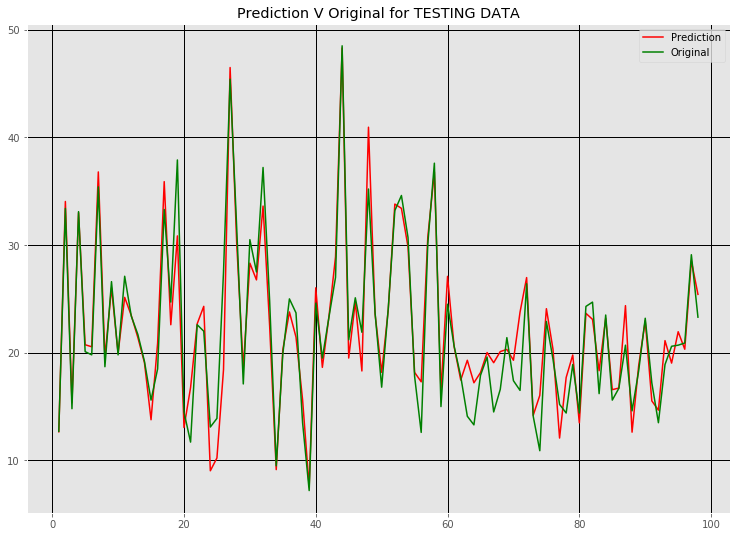

In [583]:
# Plot the values
x = np.arange(1, 99, 1.0)
plt.plot(x, p, 'r-', label='Prediction')
plt.plot(x, output_test, 'g-', label='Original')
plt.grid(color = 'black', linewidth=1)
plt.title("Prediction V Original for TESTING DATA")
plt.legend()

#### Predict and Plot Results of Total Data

In [555]:
#pca = dec.PCA(n_components=9, whiten=True)
#pca.fit(inputs)
inputs_white = pd.DataFrame(pca.transform(inputs), columns=inputs.columns)

In [556]:
p=m.predict(inputs_white)

In [557]:
medv = dfReduced['medv']

In [558]:
print("The Mean Square Error for model is",met.mean_squared_error(medv,p))
print("The R^2 value for model is",met.r2_score(medv,p).round(2))

The Mean Square Error for model is 1.7690034434976543
The R^2 value for model is 0.97


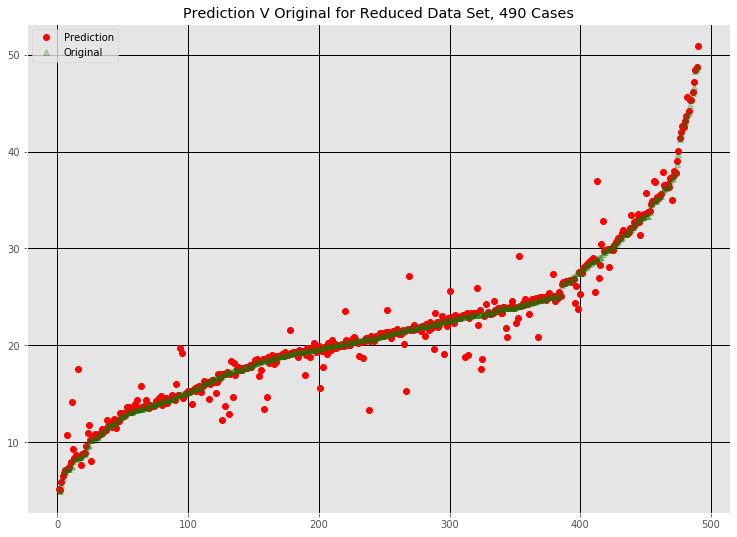

In [559]:
# Plot the values
x = np.arange(1, 491, 1.0)
plt.plot(x, p, 'ro', label='Prediction')
plt.plot(x, medv, 'g^', label='Original',alpha=0.25)
plt.grid(color = 'black', linewidth=1)
plt.title("Prediction V Original for Reduced Data Set, 490 Cases")
plt.legend()

## Conclusion

Running neural network 10 times gave an average R2 value of X and MSE of Y for the testing data set. 

The accuracy and plotting of the testing data set (20% of total data set) is indicative of neural network performance. As the network is trained on 80% of the data, providing more layers/neurons or batch size/epochs to network will overtrain the model. This is evident from current model where R2 and MSE values from testing data is less than those obtained when predictions made with entire data set.

## References

1. Data Set from Github, https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv 
2. The Boston Housing Dataset, https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
3. Laerd Statistics, https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php
4. Levene's Test, https://en.wikipedia.org/wiki/Levene%27s_test
5. Welch's t-test, https://en.wikipedia.org/wiki/Welch%27s_t-test
6. Coefficient of Determination, https://en.wikipedia.org/wiki/Coefficient_of_determination
7. PCA using Python, https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
8. Keras Documentation, https://keras.io/losses/



## END